In [ ]:
import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout
from tensorflow.keras.utils import to_categorical

In [ ]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [ ]:
# reshape to flatten the input and normalize it
x_train = x_train.reshape((x_train.shape[0],28,28)).astype('float32')/255
x_test = x_test.reshape((x_test.shape[0],28,28)).astype('float32')/255

In [ ]:
# next one hot encode label using to_categorical

y_train = to_categorical(y_train,10)
y_test = to_categorical(y_test,10)

In [ ]:
model = Sequential([
    Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(28,28,1)),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.25),
    Flatten(),
    Dense(128,activation='relu'),
    Dropout(0.5),
    Dense(10,activation='softmax')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer='adam',
               loss='categorical_crossentropy',
               metrics=['accuracy'])

In [ ]:
model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=10,batch_size=128)

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 36s 74ms/step - accuracy: 0.8212 - loss: 0.5774 - val_accuracy: 0.9751 - val_loss: 0.0862
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 40s 72ms/step - accuracy: 0.9585 - loss: 0.1412 - val_accuracy: 0.9795 - val_loss: 0.0650
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 35s 74ms/step - accuracy: 0.9677 - loss: 0.1043 - val_accuracy: 0.9817 - val_loss: 0.0511
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 34s 72ms/step - accuracy: 0.9747 - loss: 0.0854 - val_accuracy: 0.9834 - val_loss: 0.0457
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 42s 73ms/step - accuracy: 0.9765 - loss: 0.0769 - val_accuracy: 0.9842 - val_loss: 0.0424
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 33s 71ms/step - accuracy: 0.9795 - loss: 0.0662 - val_accuracy: 0.9850 - val_loss: 0.0402
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 43s 75ms/step - accuracy: 0.9812 - loss: 0.0593 - val_accuracy: 0.9868 - val_loss: 0.0362
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 34s 72ms/step - accuracy: 0.9828 - loss: 0.0535 - 

In [ ]:
loss,accuracy = model.evaluate(x_test,y_test)
print("Loss of model is:",loss*100)
print("Accuarcy pf model is:",accuracy*100)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9847 - loss: 0.0432
Loss of model is: 3.5218797624111176
Accuarcy pf model is: 98.86000156402588


In [ ]:
history = model.fit(x_train,y_train,batch_size=32,epochs=10,verbose=1,validation_data=(x_test,y_test))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 49s 26ms/step - accuracy: 0.9785 - loss: 0.0656 - val_accuracy: 0.9875 - val_loss: 0.0351
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 48s 26ms/step - accuracy: 0.9822 - loss: 0.0525 - val_accuracy: 0.9876 - val_loss: 0.0381
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 47s 25ms/step - accuracy: 0.9833 - loss: 0.0489 - val_accuracy: 0.9877 - val_loss: 0.0360
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 49s 26ms/step - accuracy: 0.9861 - loss: 0.0435 - val_accuracy: 0.9882 - val_loss: 0.0363
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 80s 25ms/step - accuracy: 0.9865 - loss: 0.0403 - val_accuracy: 0.9889 - val_loss: 0.0357
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 48s 25ms/step - accuracy: 0.9884 - loss: 0.0350 - val_accuracy: 0.9887 - val_loss: 0.0379
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 83s 26ms/step - accuracy: 0.9883 - loss: 0.0349 - val_accuracy: 0.9885 - val_loss: 0.0403
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 26ms/step - accuracy: 0.9897 -

In [ ]:
loss,accuracy = model.evaluate(x_test,y_test)
print("Loss of model is:",loss*100)
print("Accuarcy pf model is:",accuracy*100)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9872 - loss: 0.0476
Loss of model is: 4.168734699487686
Accuarcy pf model is: 98.90999794006348


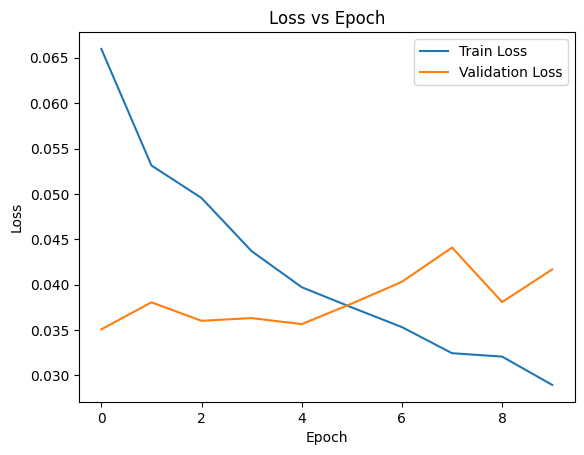

In [ ]:
import matplotlib.pyplot as plt

#plot loss
plt.plot(history.history['loss'],label='Train Loss')
plt.plot(history.history['val_loss'],label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss vs Epoch')
plt.legend()
plt.show()

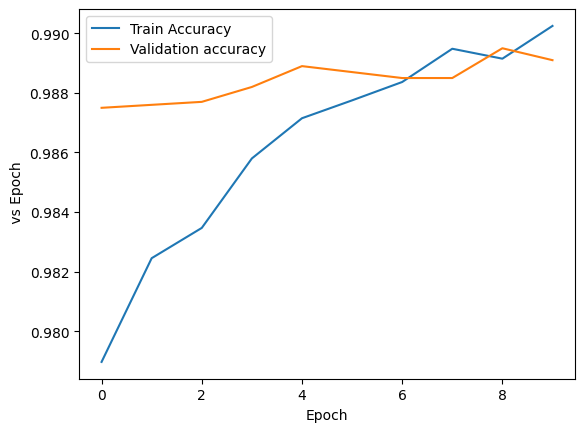

In [ ]:
#plot loss
plt.plot(history.history['accuracy'],label='Train Accuracy')
plt.plot(history.history['val_accuracy'],label='Validation accuracy')
plt.xlabel('Epoch')
plt.ylabel(' vs Epoch')
plt.legend()
plt.show()